# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Problem Statement

# An Restaurant owner wants to understand the Reviews given to the restaurant are positive or negative so as to understand the sentiments of customers coming to the restaurant 

# Import dataset

In [2]:
data=pd.read_csv('Restaurant_Reviews.tsv',delimiter="\t",quoting=3)
# quoting =3 ignores double quotes that could lead to processing errors.

In [3]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
data.isna()

,Review,Liked
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
995,False,False
996,False,False
997,False,False
998,False,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [6]:
data.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


# Cleaning of texts

One of the major requirement of NLP(sentiment analysis basically) is to clean the text before training any model on it. Cleaning majorly consists of:
1. Removing punctuations
2. Converting all the words to lower case
3. Removing stop words like "a, an, the, or etc" that arent quite relevant in predicting sentiment

In [7]:
import re #library for simplifying reviews
import nltk
nltk.download('stopwords') #downloading all the stopwords
from nltk.corpus import stopwords #importing stopwords to our notebook
from nltk.stem.porter import PorterStemmer #Stemming is a process that converts a word to its root eg loved => love, stayed => stay.
# this is necessary to optimise the dimention of the sparse matrix that will be made.


corpus = [] # new list that will contain all the cleaned reviews
for i in range(0,1000):
    #remove punctuation by replacing all punctuation with space
    review = re.sub("[^a-zA-z | ^\w+'t]",' ', data['Review'][i])
    
    #transform all capital letters to lower case
    review = review.lower()
    
    #split review to different words to apply stemming
    review = review.split()
    
    #stemming and also ignoring stopwords alongside
    ps = PorterStemmer()
    all_stopwords=stopwords.words('english')
    r_words=['no','not','off','nor',"didn't","isn't","couldn't","haven't",'or',"should've","aren't",
             "couldn","didn","doesn't",'doesn',"don't",'don','hadn',"hadn't",'hasn',"hasn't",'haven',
             'mightn',"mightn't",'mustn',"mustn't","needn't",'needn',"shouldn","shouldn't",'wasn',
             "wasn't","won't","won","wouldn't","because","same",'wouldn','should']
    for words in r_words:
        all_stopwords.remove(words)
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    
    #joining words together to form a cleaned review
    review = ' '.join(review)
    corpus.append(review)
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday off rick steve recommend love', 'select menu great price', 'get angri want damn pho', "honeslti didn't tast fresh", 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier no care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust becaus pretti sure human hair', 'shock becaus no sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', "that' right red velvet cake ohhh stuff good", 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food 4 tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer 23 decent deal', 'like

# Creating Bag of Words Model

This is the major portion of sentiment analysis to create the model which will consist of making the sparse matrix using different words from each review will constitute columns of the matrix and each row will correspond to a review.

The bag-of-words (BOW) model is a representation that turns arbitrary text into fixed-length vectors by counting how many times each word appears. This process is often referred to as vectorization.



In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y=data.iloc[:,-1].values

In [10]:
len(X[0])

1610

# Splitting data into training and test set

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# Building models

We will implement 3 models:
1. Logistic Regression
2. Naive Bayes
3. SVM

## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression()

In [13]:
y_model1=model1.predict(X_test)

### Analysing model

In [14]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_model1))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        97
           1       0.85      0.80      0.82       103

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



Text(33.0, 0.5, 'Actual')

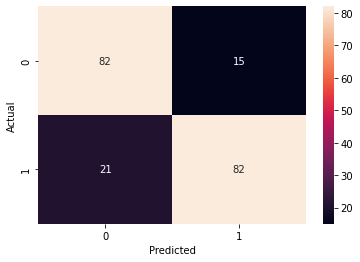

In [15]:
cm=confusion_matrix(y_test,y_model1)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB
model2=GaussianNB()
model2.fit(X_train,y_train)

GaussianNB()

In [17]:
y_model2 = model2.predict(X_test)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_model2))

              precision    recall  f1-score   support

           0       0.81      0.58      0.67        97
           1       0.69      0.87      0.77       103

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.72       200
weighted avg       0.75      0.73      0.72       200



Text(33.0, 0.5, 'Actual')

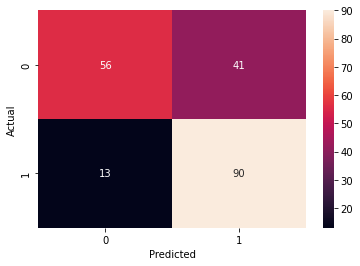

In [19]:
cm=confusion_matrix(y_test,y_model2)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

## SVM

In [20]:
from sklearn.svm import SVC
model3=SVC(kernel='rbf')
model3.fit(X_train,y_train)

SVC()

In [21]:
y_model3 = model3.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_model3))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82        97
           1       0.90      0.70      0.79       103

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.80       200
weighted avg       0.82      0.81      0.80       200



Text(33.0, 0.5, 'Actual')

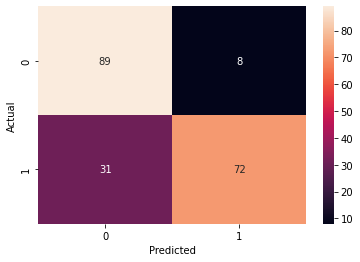

In [23]:
cm=confusion_matrix(y_test,y_model3)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

We get highest accuracy with logistic regression

In the above result we have undrestood that precision i.e False Positive is very much important in the business point of view 
as the reviews which are positive and still marked under negative will impact the rating and also to no. of customers coming to
the restaurant looking at the reviews 

# Predicting the Reviews

In [26]:
sample_review = 'The food is really good here.'
sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
sample_review = sample_review.lower()
sample_review_words = sample_review.split()
ps = PorterStemmer()
all_stopwords=stopwords.words('english')
all_stopwords.remove('not')
#sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
final_review = [ps.stem(word) for word in sample_review_words]
final_review = ' '.join(final_review)
new_corpus = [final_review]
new_x_test = cv.transform(new_corpus).toarray()
new_y_pred = model1.predict(new_x_test)
print(new_y_pred)

[1]


In [27]:
sample_review = 'Food was pretty bad and the service was very slow.'
sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
sample_review = sample_review.lower()
sample_review_words = sample_review.split()
ps = PorterStemmer()
all_stopwords=stopwords.words('english')
all_stopwords.remove('not')
#sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
final_review = [ps.stem(word) for word in sample_review_words]
final_review = ' '.join(final_review)
new_corpus = [final_review]
new_x_test = cv.transform(new_corpus).toarray()
new_y_pred = model1.predict(new_x_test)
print(new_y_pred)

[0]


In [28]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

In [29]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [30]:
# Predicting values
sample_review = 'The food is really good here.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [31]:
# Predicting values
sample_review = 'Food was pretty bad and the service was very slow.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a NEGATIVE review!


In [32]:
# Predicting values
sample_review = 'The food was absolutely wonderful, from preparation to presentation, very pleasing.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.
